# Data Modeling

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

(100121, 43)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a918be0>]],
      dtype=object)

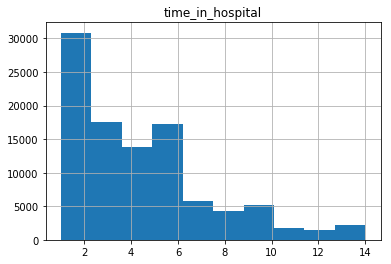

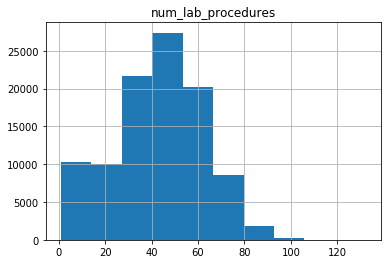

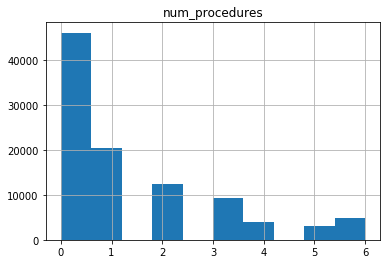

In [73]:
df = pd.read_csv("dataset_diabetes/dataCategorizedNew.csv", index_col=0)
print(df.shape)

#https://www.analyticsvidhya.com/blog/2015/11/8-ways-deal-continuous-variables-predictive-modeling/
# To deal with them we need to either normalize them, or perform log transformation.

# We have continuous variables in our data.
# these columns has nice distribution so we will just apply normalization
# which are time_in_hospital, num_lab_procedures, num_procedures.
df.hist(column='time_in_hospital')
df.hist(column='num_lab_procedures')
df.hist(column='num_procedures')
# df['time_in_hospital_norm'] = Normalizer().fit_transform(df[['time_in_hospital']])
# df['num_lab_procedures_norm'] = Normalizer().fit_transform(df[['num_lab_procedures']])
# df['num_procedures_norm'] = Normalizer().fit_transform(df[['num_procedures']])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b172be0>]],
      dtype=object)

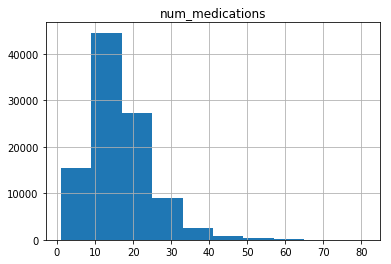

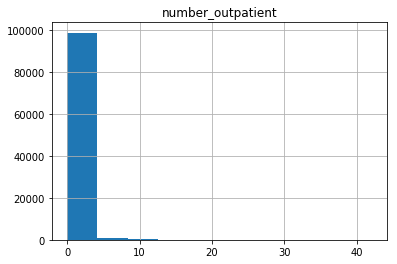

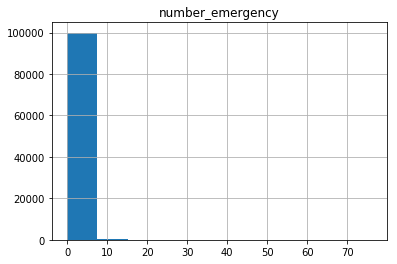

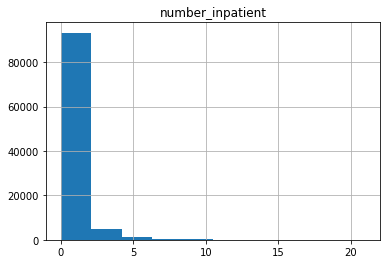

In [68]:
# Since these columns are skewed, we will perform log transformation for these columns 
# num_medications, number_outpatient, number_emergency, number_inpatient
df.hist(column='num_medications')
df.hist(column='number_outpatient')
df.hist(column='number_emergency')
df.hist(column='number_inpatient')

# df['number_inpatient_log'] = np.log(1 + df.number_inpatient)
# df['number_outpatient_log'] = np.log(1 + df.number_outpatient)
# df['number_emergency_log'] = np.log(1 + df.number_emergency)
# df['num_medications_log'] = np.log(1 + df.num_medications)
# df = df.drop(['num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient'], axis=1)
# df = df.drop(['time_in_hospital', 'num_lab_procedures', 'num_procedures'], axis=1)

In [69]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,4,5,25,1,1,41,0,1,...,1,1,1,1,1,1,1,1,0,0
1,2,0,14,1,1,7,3,59,0,18,...,1,3,1,1,1,1,1,0,1,1
2,0,0,24,1,1,7,2,11,5,13,...,1,1,1,1,1,1,1,1,1,0
3,2,1,34,1,1,7,2,44,1,16,...,1,3,1,1,1,1,1,0,1,0
4,2,1,44,1,1,7,1,51,0,8,...,1,2,1,1,1,1,1,0,1,0
5,2,1,54,1,1,1,3,31,6,16,...,1,2,1,1,1,1,1,1,1,1
6,2,1,64,3,1,1,4,70,1,21,...,1,2,1,1,1,1,1,0,1,0
7,2,1,74,1,1,7,5,73,0,12,...,1,1,1,1,1,1,1,1,1,1
8,2,0,84,1,1,4,13,68,2,28,...,1,2,1,1,1,1,1,0,1,0
9,2,0,94,3,3,4,12,33,3,18,...,1,2,1,1,1,1,1,0,1,0


In [70]:
Preprocessed_df_y = df['readmitted']
Preprocessed_df_x = df.drop(['readmitted'], axis=1)

In [74]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(Preprocessed_df_x, Preprocessed_df_y, test_size=0.20, random_state=80)


gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, Y_train)
Y_predict = gbm.predict(X_test)

from sklearn.metrics import f1_score,accuracy_score
print(f1_score(Y_test, Y_predict, average='macro'))
print(accuracy_score(Y_test, Y_predict))

0.6282631692750715
0.6374032459425718


/Users/carora/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [75]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
from sklearn.metrics import f1_score,accuracy_score
print(f1_score(Y_test, Y_predict, average='macro'))
print(accuracy_score(Y_test, Y_predict))


from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf.fit(X_train, Y_train)
Y_predict = clf.predict(X_test)
from sklearn.metrics import f1_score,accuracy_score
print(f1_score(Y_test, Y_predict, average='macro'))
print(accuracy_score(Y_test, Y_predict))


0.5506417131534427
0.5524094881398253
0.6095329675903058
0.6244194756554308


In [ ]:
if __name__ == "__main__":
    prediction_output_file_name = "format.dat"
    train_data_file_name = "data/train.dat"
    run(train_data_file_name, prediction_output_file_name)
